In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import glob
from plot_utils import plt2D

In [2]:
path = "../data/am4_cmip/"
year = '20060612-20141231'
exp = 'c96L33_am4p0_qadt_cosp_2010'


f = xr.open_mfdataset(path + 'nh_' + year + "_average_transect_" + exp +"_cmip_all.nc",decode_cf = True).load()
f.close()

fsh = xr.open_mfdataset(path + 'sh_' + year + "_average_transect_" + exp +"_cmip_all.nc",decode_cf = True).load()
fsh.close()

In [3]:
f = f.sel(distance = slice(-6.5, 6.5))
fsh = fsh.sel(distance = slice(-6.5, 6.5))

pres = f.plev19.expand_dims(distance = f['distance'].size).transpose().expand_dims(season = f['season'].size)
f['pt'] = f.ta*(1000./pres)**(0.286) 

pres = fsh.plev19.expand_dims(distance = fsh['distance'].size).transpose().expand_dims(season = fsh['season'].size)
fsh['pt'] = fsh.ta*(1000./pres)**(0.286) 

myfontsize = 12

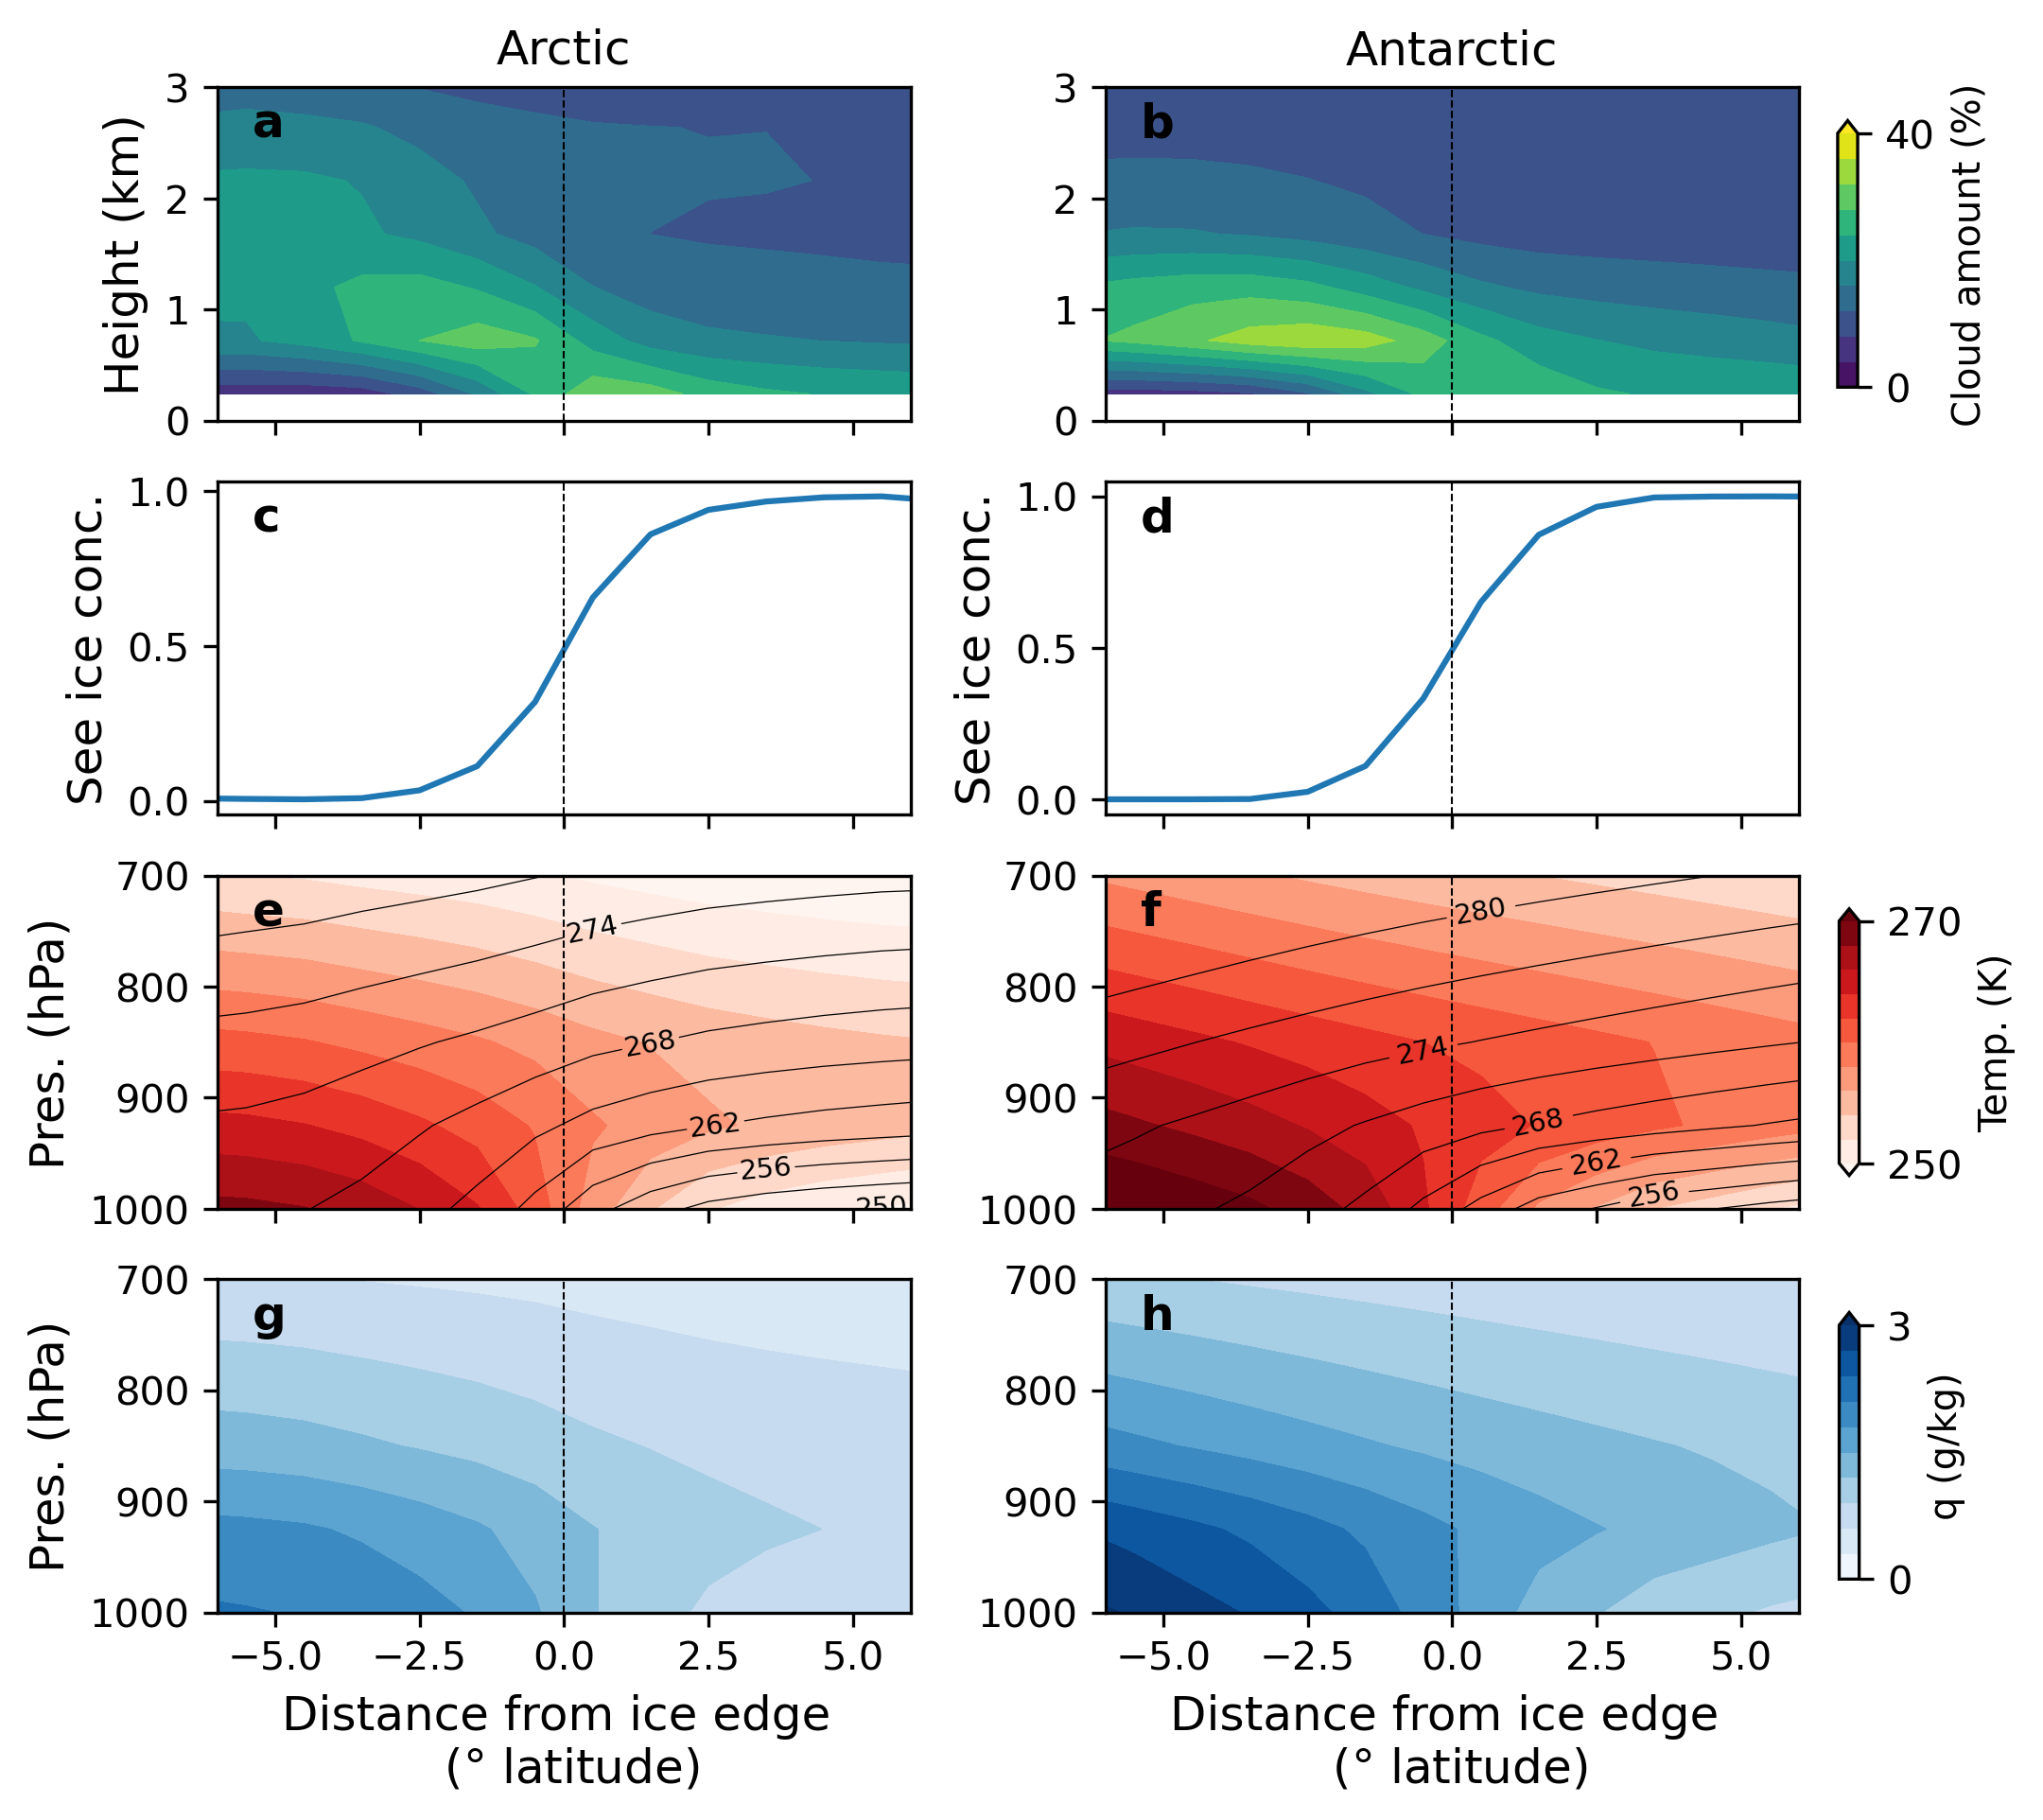

In [6]:
myfontsize = 12
fig, axs = plt.subplots(ncols = 2,
                        nrows = 4,
                        sharex = True, sharey = False,
                        figsize=(18/2.54, 16/2.54), dpi = 300, constrained_layout=True)

ff0 = f.isel(season = 0)
mytitle = 'Arctic'

#--------------First col-----------------------------------------------------------
x = ff0.distance.values
y = ff0.altitude.values

#1
var = ff0.clcalipso
plt2D(fig, axs[0,0], x, y, var, title = mytitle, yrange = [0., 3.], extend = 'max', 
      zlabel = 'Cloud amount (%)', ylabel = 'Height (km)', cbar = False)

#2
var = ff0.ice_mask
oax = axs[1,0].plot(x, var)
axs[1,0].axvline(x=0., color='black', lw = 0.5, linestyle='--')
axs[1,0].set_ylabel('See ice conc.', fontsize=myfontsize) 

#3
y = ff0.plev19.values
var = ff0.ta
plt2D(fig, axs[2,0], x, y, var, cmap=cm.Reds, levels=np.linspace(250, 270, 10 + 1), zlabel = 'Temp. (K)', 
      cbar = False, ylabel = 'Pres. (hPa)')

CS = axs[2,0].contour(x, y, ff0.pt, levels = np.linspace(250, 280, 10 + 1), colors = 'black', linewidths= 0.3)
plt.clabel(CS, CS.levels[::2], fontsize=7, inline=1,fmt = '%2.0f')
    
#4
var = 1000.*ff0.hus
plt2D(fig, axs[3,0], x, y, var, cmap=cm.Blues, levels=np.linspace(0, 3, 10 + 1), zlabel = 'q (g/kg)', 
      cbar = False, xlabel = True, ylabel = 'Pres. (hPa)')

#--------------Second col-----------------------------------------------------------
ff0 = fsh.isel(season = 1)
mytitle = 'Antarctic'

x = -ff0.distance.values
y = ff0.altitude.values

#1
var = ff0.clcalipso
plt2D(fig, axs[0,1], x, y, var, title = mytitle, yrange = [0., 3.], extend = 'max', 
      zlabel = 'Cloud amount (%)', ylabel = '')

#2
var = ff0.ice_mask
oax = axs[1,1].plot(x, var)
axs[1,1].axvline(x=0., color='black', lw = 0.5, linestyle='--')
axs[1,1].set_ylabel('See ice conc.', fontsize=myfontsize) 

#3
y = ff0.plev19.values
var = ff0.ta
plt2D(fig, axs[2,1], x, y, var, cmap=cm.Reds, levels=np.linspace(250, 270, 10 + 1), zlabel = 'Temp. (K)', 
      ylabel = '')

CS = axs[2,1].contour(x, y, ff0.pt, levels = np.linspace(250, 280, 10 + 1), colors = 'black', linewidths= 0.3)
plt.clabel(CS, CS.levels[::2], fontsize=7, inline=True,fmt = '%2.0f')

#4
var = 1000.*ff0.hus
plt2D(fig, axs[3,1], x, y, var, cmap=cm.Blues, levels=np.linspace(0, 3, 10 + 1), zlabel = 'q (g/kg)', 
      ylabel = '', extend = 'max', xlabel = True)

mylabel = np.array((['a','b'],['c','d'], ['e','f'], ['g','h']))

for i in range(4):
    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')

fig.savefig('Fig4_am4_cmip.png', dpi=fig.dpi, bbox_inches='tight')